# Lesson 4: Demystifying Diffusion

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonathandinu/programming-generative-ai/blob/main/notebooks/04-demystifying-diffusion.ipynb) [![GitHub Repo stars](https://img.shields.io/github/stars/jonathandinu/programming-generative-ai?style=social)](https://github.com/jonathandinu/programming-generative-ai)

> Colab for interactive execution in your browser (no setup) and repository for notebook index and additional resources (slides, etc.)

In [1]:
# install dependencies for cloud notebook environments, i.e. Google Colab
%pip install -U diffusers["torch"] torch torchvision matplotlib scikit-image

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121


In [2]:
import torch

# default device boilerplate
device = (
    "cuda" # Device for NVIDIA or AMD GPUs
    if torch.cuda.is_available()
    else "mps" # Device for Apple Silicon (Metal Performance Shaders)
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


## 4.4 Generating Images with Diffusers' Pipelines

* SFHQ dataset: https://github.com/SelfishGene/SFHQ-dataset
* HF model repo: https://huggingface.co/jonathandinu/ddpm-ema-sfhq-256

In [3]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline \
    .from_pretrained("jonathandinu/ddpm-ema-sfhq-256")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
pipeline

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "jonathandinu/ddpm-ema-sfhq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [5]:
pipeline.to(device)

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "jonathandinu/ddpm-ema-sfhq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

In [6]:
pipeline(num_inference_steps=1)

  0%|          | 0/1 [00:00<?, ?it/s]

ImagePipelineOutput(images=[<PIL.Image.Image image mode=RGB size=256x256 at 0x7E189BE75A20>])

  0%|          | 0/50 [00:00<?, ?it/s]

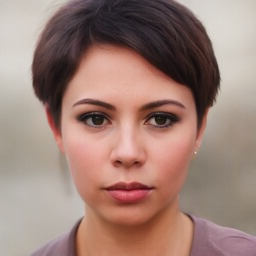

In [7]:
pipeline(num_inference_steps=50).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

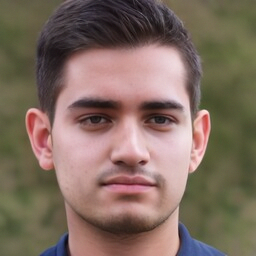

In [8]:
image = pipeline(num_inference_steps=50, generator=torch.Generator().manual_seed(1)).images[0]
image

In [9]:
image.save('image.jpg')

In [10]:
images = pipeline(batch_size=4, num_inference_steps=50, generator=torch.Generator().manual_seed(13)).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [11]:
for i in range(4):
  pipeline(num_inference_steps=50, generator=torch.Generator().manual_seed(1)).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
from diffusers import utils

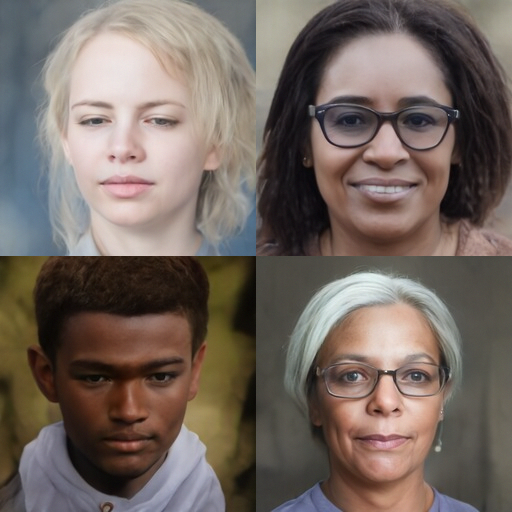

In [13]:
utils.make_image_grid(images, rows=2, cols=2)

## 4.5 Deconstructing the Diffusion Process

In [14]:
from diffusers import DDPMScheduler, UNet2DModel

In [15]:
generator = torch.manual_seed(8)
scheduler = DDPMScheduler.from_pretrained("jonathandinu/ddpm-ema-sfhq-256", subfolder="scheduler")
model = UNet2DModel.from_pretrained("jonathandinu/ddpm-ema-sfhq-256", generator=generator, subfolder="unet").to(device)

In [16]:
pipeline.scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.31.0",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [17]:
pipeline.unet

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-05, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Con

In [18]:
scheduler.set_timesteps(50)
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [19]:
sample_size = model.config.sample_size

In [20]:
sample_size

256

In [21]:
noise_dims = (1, 3, sample_size, sample_size)
image = torch.randn(noise_dims, generator=generator).to(device)

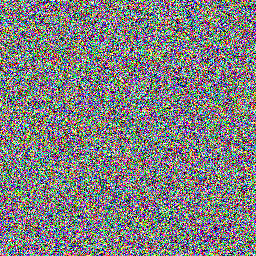

In [22]:
utils.pt_to_pil(image)[0]

In [23]:
intermediate = []

for idx, t in enumerate(scheduler.timesteps):
    with torch.no_grad():
        noisy_residual = model(image, t).sample

    image = scheduler.step(noisy_residual, t, image).prev_sample

    if (idx % 5) == 0:
      intermediate.append(utils.pt_to_pil(image)[0])

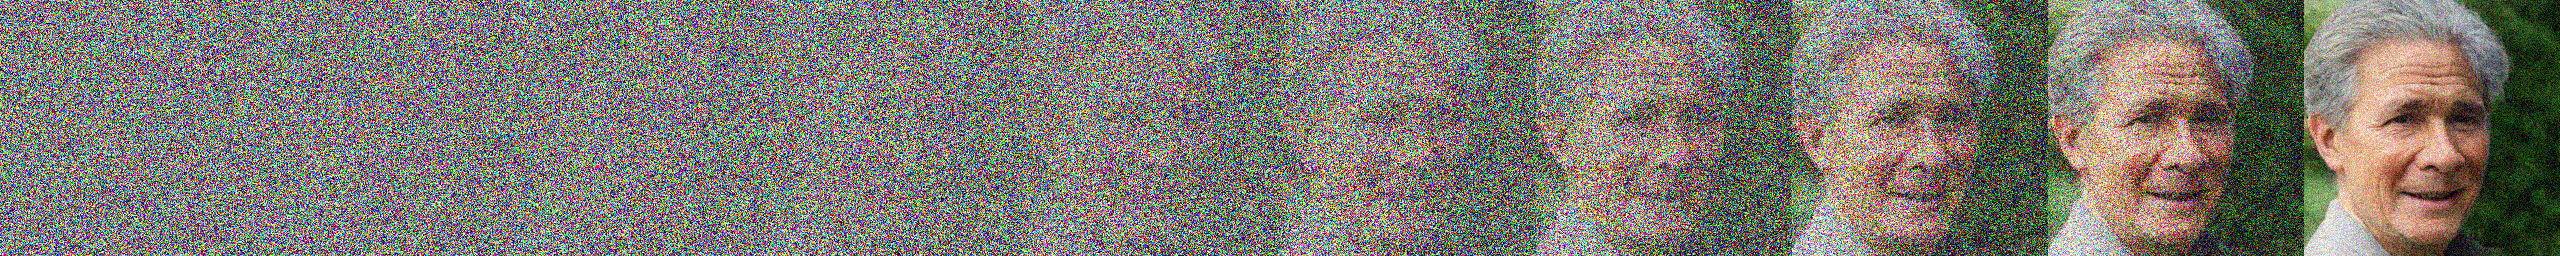

In [24]:
utils.make_image_grid(intermediate, rows=1, cols=10)

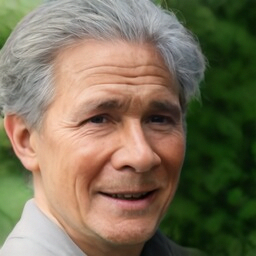

In [25]:
utils.pt_to_pil(image)[0]

## 4.6 Forward Process as Encoder

In [26]:
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.31.0",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [27]:
# model(noisy_image, t)
model

UNet2DModel(
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=128, out_features=512, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=512, out_features=512, bias=True)
  )
  (down_blocks): ModuleList(
    (0-1): 2 x DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 128, eps=1e-05, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Con

In [28]:
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [29]:
from torchvision import transforms

In [30]:
# preprocess(image)
preprocess = transforms.Compose(
    [
        transforms.Resize((sample_size, sample_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]
)

In [31]:
from torchvision.transforms import v2

def encode(image, t0, num_steps=50):
    # forward process

    tensor = preprocess(image).to(device)
    scheduler.set_timesteps(num_steps)
    generator = torch.manual_seed(0)

    noise_dims = (1, 3, sample_size, sample_size)
    noise = torch.randn((1, 3, sample_size, sample_size), generator=generator).to("cuda")

    return scheduler.add_noise(tensor, noise, scheduler.timesteps[t0])

In [32]:
# download image with wget
!wget https://raw.githubusercontent.com/jonathandinu/programming-generative-ai/refs/heads/main/images/jon.jpg

--2024-12-15 20:36:39--  https://raw.githubusercontent.com/jonathandinu/programming-generative-ai/refs/heads/main/images/jon.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15097 (15K) [image/jpeg]
Saving to: ‘jon.jpg’

jon.jpg             100%[===================>]  14.74K  --.-KB/s    in 0s      

2024-12-15 20:36:40 (104 MB/s) - ‘jon.jpg’ saved [15097/15097]



In [33]:
!ls

image.jpg  jon.jpg  sample_data


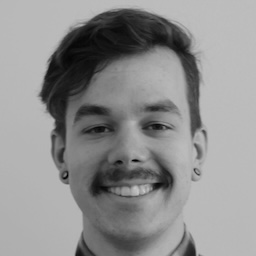

In [34]:
# load directly from url
# utils.load_image('https://raw.githubusercontent.com/jonathandinu/programming-generative-ai/refs/heads/main/images/jon.jpg')

image = utils.load_image('jon.jpg')
image

In [35]:
v2.functional.pil_to_tensor(image)

tensor([[[183, 183, 183,  ..., 189, 188, 188],
         [183, 183, 184,  ..., 189, 188, 188],
         [183, 184, 184,  ..., 189, 188, 188],
         ...,
         [174, 174, 174,  ..., 184, 184, 184],
         [173, 174, 174,  ..., 184, 183, 183],
         [173, 173, 174,  ..., 183, 183, 183]],

        [[183, 183, 183,  ..., 189, 188, 188],
         [183, 183, 184,  ..., 189, 188, 188],
         [183, 184, 184,  ..., 189, 188, 188],
         ...,
         [174, 174, 174,  ..., 184, 184, 184],
         [173, 174, 174,  ..., 184, 183, 183],
         [173, 173, 174,  ..., 183, 183, 183]],

        [[183, 183, 183,  ..., 189, 188, 188],
         [183, 183, 184,  ..., 189, 188, 188],
         [183, 184, 184,  ..., 189, 188, 188],
         ...,
         [174, 174, 174,  ..., 184, 184, 184],
         [173, 174, 174,  ..., 184, 183, 183],
         [173, 173, 174,  ..., 183, 183, 183]]], dtype=torch.uint8)

In [36]:
torch.randn((1, 3, sample_size, sample_size), generator=generator)

tensor([[[[ 0.3401, -0.5005, -0.4861,  ..., -0.6266,  1.2155, -0.6852],
          [-0.1779,  0.2755, -2.2046,  ...,  2.3517,  0.6009,  1.0034],
          [ 0.0886,  3.2905, -1.4077,  ..., -0.5921, -0.4497, -0.3280],
          ...,
          [ 0.3806, -0.9702, -2.2917,  ..., -0.9337,  1.7178, -0.8261],
          [ 1.4668,  0.9237, -1.5302,  ...,  0.9115, -0.6273, -0.7373],
          [-0.9294,  2.4984, -2.1382,  ...,  1.3700,  0.7986, -0.4238]],

         [[ 0.8474,  1.5375,  0.7589,  ..., -0.7913, -0.8090,  0.0922],
          [ 0.2006,  0.9133,  0.7611,  ...,  0.2486,  0.7775,  0.0450],
          [-0.8009,  0.0331, -1.0709,  ..., -0.8553,  0.9850,  0.0629],
          ...,
          [-0.2387,  1.7583,  0.6131,  ...,  0.3364,  0.1027, -0.4805],
          [-1.8337, -1.9733,  0.5595,  ..., -0.1516, -1.5883,  1.8166],
          [ 0.5428, -0.1284, -0.9168,  ..., -0.8268,  0.5115, -0.0187]],

         [[-0.5609, -0.7843, -0.4089,  ...,  0.5773,  0.7832,  0.0370],
          [ 0.9048,  1.4127,  

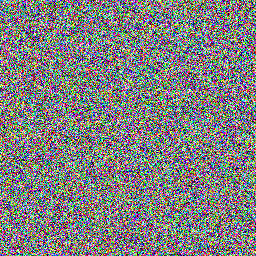

In [37]:
utils.pt_to_pil(encode(image, 0))[0]

## 4.7 Reverse Process as Decoder

In [38]:
def decode(noise_image, t0, num_steps=50):
    # reverse process
    scheduler.set_timesteps(num_steps)

    for idx, t in enumerate(scheduler.timesteps[t0:]):
      with torch.no_grad():
          noisy_residual = model(noise_image, t).sample

      noise_image = scheduler.step(noisy_residual, t, noise_image).prev_sample

    return noise_image

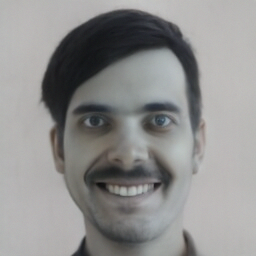

In [39]:
utils.pt_to_pil(decode(encode(image, 30), 30))[0]

## 4.10 Image Restoration and Enhancement

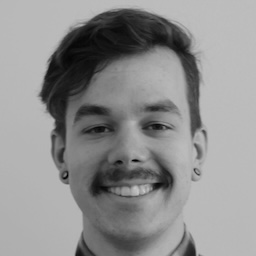

In [40]:
image = utils.load_image('jon.jpg')
image

In [41]:
image.size

(256, 256)

In [42]:
small_jon = v2.functional.resize(image, (24, 24))
small_jon

In [43]:
blurry_jon = v2.functional.resize(small_jon, (256, 256))

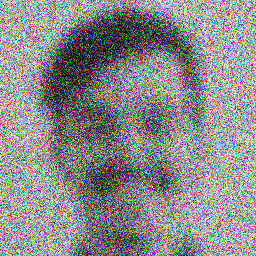

In [44]:
t0 = 40

utils.pt_to_pil(encode(blurry_jon, t0))[0]

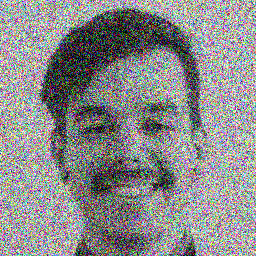

In [45]:
utils.pt_to_pil(encode(image, t0))[0]

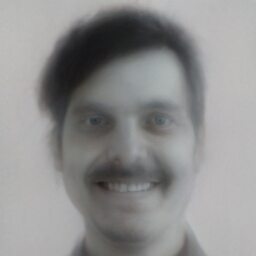

In [46]:
utils.pt_to_pil(decode(encode(blurry_jon, t0), t0))[0]

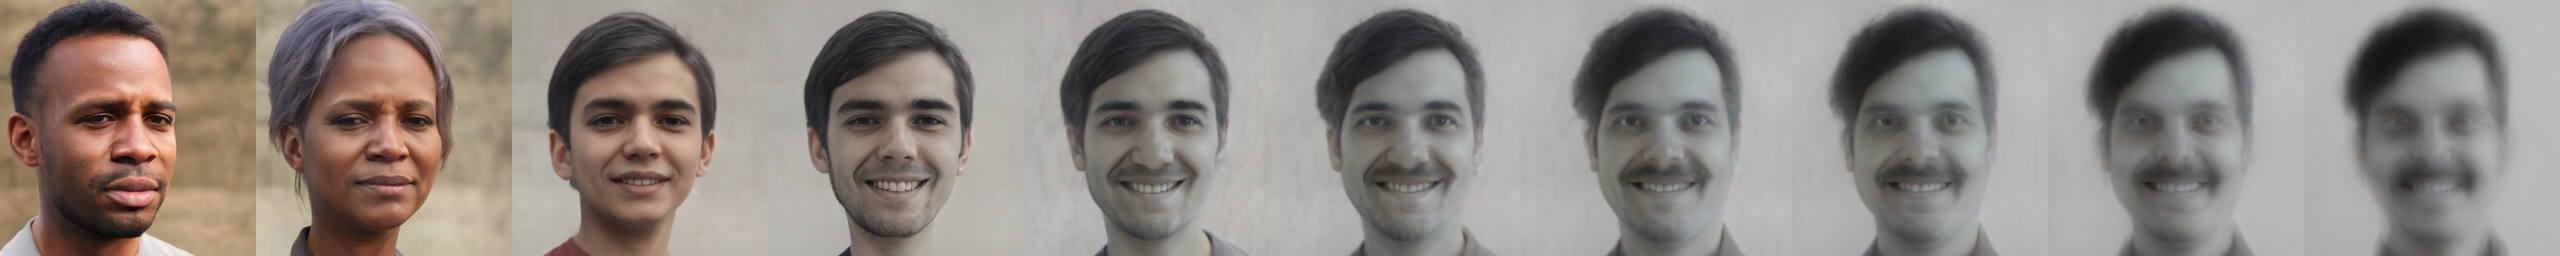

In [47]:
images = [utils.pt_to_pil(decode(encode(blurry_jon, t), t))[0] for t in range(0, 50, 5)]
utils.make_image_grid(images, rows=1, cols=10)

In [48]:
!wget https://raw.githubusercontent.com/jonathandinu/programming-generative-ai/refs/heads/main/images/jon_edit.jpg

--2024-12-15 20:37:19--  https://raw.githubusercontent.com/jonathandinu/programming-generative-ai/refs/heads/main/images/jon_edit.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20228 (20K) [image/jpeg]
Saving to: ‘jon_edit.jpg’

jon_edit.jpg        100%[===================>]  19.75K  --.-KB/s    in 0s      

2024-12-15 20:37:20 (125 MB/s) - ‘jon_edit.jpg’ saved [20228/20228]



In [49]:
!ls

image.jpg  jon_edit.jpg  jon.jpg  sample_data


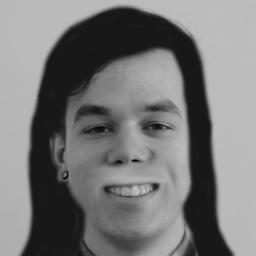

In [50]:
image = utils.load_image('jon_edit.jpg')
image

In [51]:
images = [utils.pt_to_pil(decode(encode(image, t), t))[0] for t in range(0, 50, 5)]

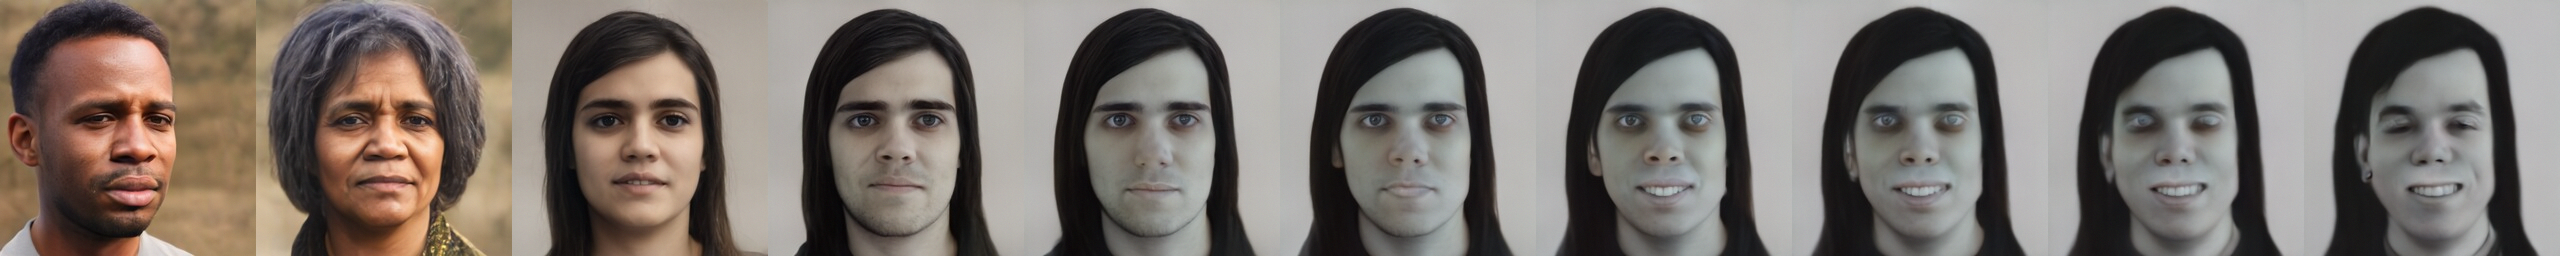

In [52]:
utils.make_image_grid(images, rows=1, cols=10)

## Appendix

In [53]:
# version of Python of the current Jupyter kernel
import sys, datetime

print(f"Current notebook Python version: {sys.version}")
print(f"Notebook last executed: {datetime.datetime.now()}")

Current notebook Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Notebook last executed: 2024-12-15 20:37:55.552200


In [54]:
# package versions when this notebook was last run in Colab (and committed)
!pip freeze

absl-py==1.4.0
accelerate==1.1.1
aiohappyeyeballs==2.4.4
aiohttp==3.11.10
aiosignal==1.3.1
alabaster==1.0.0
albucore==0.0.19
albumentations==1.4.20
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.20.0
astropy==6.1.7
astropy-iers-data==0.2024.12.9.0.36.21
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.27.0
bigquery-magics==0.4.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==2.7.1
bokeh==3.6.2
Bottleneck==1.4.2
bqplot==0.12.43
branca==0.8.0
CacheControl==0.14.1
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.20.0
cloudpickle==3.1.0
cmake==3.30.5
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contourpy==1